# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [96]:
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [97]:
medical.shape

(1338, 8)

In [98]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

The 'from scipy.stats import norm' was not inlcuded so I imported to sample 100 variables from the Kaggle dataset of 1338

__A:__

In [99]:
#seed(500)
#sample_charges = norm.rvs(size=100)
#sample_charges

I don't need to draw random samples from this data set, as we are operating on the assumption that this dataset is already a random sample.

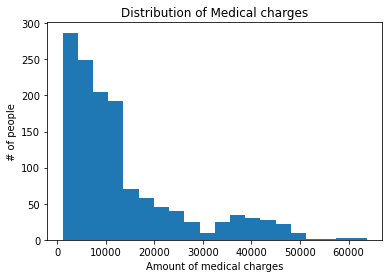

In [101]:
_ = plt.hist(medical['charges'], bins=20)
_ = plt.xlabel('Amount of medical charges')
_ = plt.ylabel('# of people')
_ = plt.title('Distribution of Medical charges')

In [102]:
medical_mean = np.mean(medical['charges'])
medical_mean

13270.422265141257

In [103]:
medical_std = np.std(medical['charges'])
medical_std

12105.484975561605

This distrubtion have a long right skewed tail. It appears that policy holders on avg have medical charges about 13,000 dollars with a standard deviation of about 12,000 dollars. 

__Q2:__ The administrator is __concerned that the actual average charge has fallen below 12,000__, threatening the hospital's operational model. On the assumption that these __data represent a random sample of charges__, how would you justify that these data allow you to answer that question? And what would be the __most appropriate frequentist test__, of the ones discussed so far, to apply?

__A:__

After observing the summary statistics for the insurance dataset, with an average medical charge about 13,000 and std of 12,000, it is possible that the average has fallen below 12,000. This dataset inlcudes 1338 observations, which is an appropriate sample size to base assumptions on. By using __a one-sided test__(looking for probabilty of charges below 12,000), using the __Student distribution__ (bc of population variance is unknown), with __degrees of freedom equal to 1337__, which is (n-1), and a __significant level of 5 percent = 0.05__.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

Given the administrator's concern, I would suggest a confidence interval of 99 percent to ensure our estimates have a narrow confidence intervals. A one-sided interval is most appropriate, given they are most interested in confirming if average revenues are below 12,000. 

Distribution: __Student distribution__

DDOF: __1337__

Significance level: __0.05__

Confidence interval: __One-sided internal__


In [104]:
#define probability 
p = 0.95
dof = 1337
critical_value = t.ppf(p, dof)
standard_error = medical_std/np.sqrt(len(medical))
print(critical_value)
print(standard_error)

1.6459941145571317
330.943713906084


In [105]:
MoE = critical_value * standard_error
MoE

544.7314053390934

In [106]:
Lower_CI = medical_mean - MoE
Lower_CI

12725.690859802164

The administrator then wants to know __whether people with insurance really are charged a different amount to those without__.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 

Ho: Insurance policy holders are charged the same amount as those without insurance.

H1: Insurance policy holders are charged a different amount than those without insurance. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [107]:
insurance_df = medical[medical['insuranceclaim']==1]

no_insurance_df = medical[medical['insuranceclaim']==0]

In [127]:
insurance_df.shape

(783, 8)

In [128]:
no_insurance_df.shape

(555, 8)

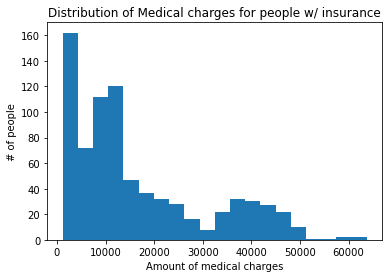

In [124]:
_ = plt.hist(insurance_df['charges'], bins=20)
_ = plt.xlabel('Amount of medical charges')
_ = plt.ylabel('# of people')
_ = plt.title('Distribution of Medical charges for people w/ insurance')

In [110]:
insurance_df_mean = np.mean(insurance_df['charges'])
insurance_df_mean

16423.928276537663

In [114]:
insurance_df_std = np.std(insurance_df['charges'])
insurance_df_std

14036.956250260411

In [130]:
#define probability of insurance and non-insurance holders being charged the same
p = 0.95
dof = 782
critical_value = t.ppf(p, dof)
standard_error = insurance_df_std/np.sqrt(len(insurance_df))
print(critical_value)
print(standard_error)

1.6468045053047828
501.63989156246396


In [131]:
MoE = critical_value * standard_error
MoE

826.1028334656684

In [132]:
Lower_CI = standard_error - MoE
Lower_CI

-324.4629419032044

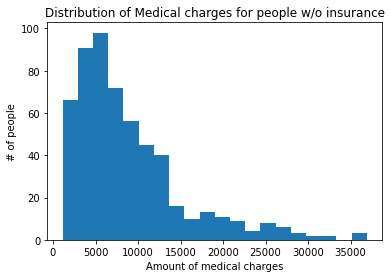

In [133]:
_ = plt.hist(no_insurance_df['charges'], bins=20)
_ = plt.xlabel('Amount of medical charges')
_ = plt.ylabel('# of people')
_ = plt.title('Distribution of Medical charges for people w/o insurance')

In [134]:
no_insurance_mean = np.mean(no_insurance_df['charges'])
no_insurance_mean

8821.421892306294

In [135]:
no_insurance_std = np.std(no_insurance_df['charges'])
no_insurance_std

6440.699841605233

In [136]:
#define probability of insurance and non-insurance holders being charged the same
p = 0.95
dof = 555
critical_value = t.ppf(p, dof)
standard_error = no_insurance_std/np.sqrt(len(no_insurance_df))
print(critical_value)
print(standard_error)

1.6476037733761735
273.39248244755277


In [138]:
MoE = critical_value * standard_error
MoE

450.4424856932672

In [139]:
Lower_CI = standard_error - MoE
Lower_CI

-177.05000324571444

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test